# Heart Disease UCI

In this project, the heart disease data set originated from https://archive.ics.uci.edu/ml/datasets/Heart+Disease has been used to train a model to predict if there is the presence of heart disease in patients. This problem is a classification problem, so the classification methods, namely, Logistic Regression, SVM, kNN, Naive Bayes' classification, Decision Tree, and Random Forest, will be used. Each model will be tested using k-Fold Cross-validation.

## Table of Contents
1. [Set up environment and import data](#Data)
2. [Data Analyze](#DataAnalyze)
    1. [Feature information](#feature)
    2. [Target information](#target)
    3. [Categorical features](#categorical)
    4. [Numerical features](#numerical)
    5. [Numerical distribution](#numdistribution)
    6. [Creating dummy variables](#dummy)
    7. [Correlation matrix](#correlation)
    8. [Summary](#summary)
3. [Machine Learning](#machine)
    1. [Logistic Regression](#logistic)
    2. [Support Vector Machine (SVM)](#SVM)
    3. [k Nearest-Neighbor (kNN)](#kNN)
    4. [Naive Bayes classification](#naive)
    5. [Decision tree classification](#tree)
    6. [Random forest classification](#forest)
    7. [Summary](#summary)
    8. [Ensemble Model](#ensemble)
4. [Artificial Neural Network](#network)



## 1. Set up environment and import data <a name = 'Data'>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data set
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


This data set is clean because there is no missing value.

## 2. Data Analyse <a name = 'DataAnalyze'>
### A. Feature information <a name ='feature'>
The data set have 13 independent variables or features
    1. Age
    2. Sex
    3. Chest pain types (4 Values)
    4. Resting blood pressure
    5. Serum cholestoral in mg/dl
    6. Fasting blood sugar
    7. Resting electrocardiographic results (values 0,1,2)
    8. Maximum heart rate achieved 
    9. Exercise induced angina
    10. oldpeak = ST depression induced by exercise relative to rest 
    11. The slope of the peak exercise ST segment 
    12. Number of major vessels (0-3) colored by flourosopy 
    13. Thalassemia: 1 = normal; 2 = fixed defect; 3 = reversable defect

### B. Target information <a name = 'target'>
The presence of heart disease is represented by integer: 1 = Presence and 0 = Absence



For easy interpretation, each columns should be renamed.

In [6]:
df.columns = ['Age', 'Sex', 'ChestPain', 'RestingBps', 'Cholestoral', 'FastingBloodSugar', 'RestingEcg', 
              'MaximumHeartRate', 'ExcerciseInducedAngina', 'STDepression', 'Slope', 'NumberOfBloodVessel', 'Thalassemia', 
              'Target']

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestingBps', 'Cholestoral',
       'FastingBloodSugar', 'RestingEcg', 'MaximumHeartRate',
       'ExcerciseInducedAngina', 'STDepression', 'Slope',
       'NumberOfBloodVessel', 'Thalassemia', 'Target'],
      dtype='object')

### C. Categorical features <a name ='categorical'>
    1. Sex: 0 = Female, 1 = Male
    2. Chest pain types: 0 = no chest pain, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain
    3. Fasting blood sugar > 120 mg/dl): 1 = True, 0 = False
    4. Resting electrocardiographic results: 0 = Normal, 1 = having ST-T wave abnormality, 
        2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
    5. Exercise induced angina : 1 = Yes, 0 = No
    6. The slope of the peak exercise ST segment: 0 = upsloping, 1 = flat, 2 = downsloping
    7. Thalassemia: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [8]:
cate = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingEcg',
       'ExcerciseInducedAngina', 'Slope','Thalassemia']

In [9]:
df[cate].head()

,Sex,ChestPain,FastingBloodSugar,RestingEcg,ExcerciseInducedAngina,Slope,Thalassemia
0,1,3,1,0,0,0,1
1,1,2,0,1,0,0,2
2,0,1,0,0,0,2,2
3,1,1,0,1,0,2,2
4,0,0,0,1,1,2,2


Let's translate the categorical features into texts instead of integers.

In [10]:
df['Sex'][df['Sex']==0] = 'Female';
df['Sex'][df['Sex']==1] = 'Male';

df['ChestPain'][df['ChestPain']==0] = 'Normal';
df['ChestPain'][df['ChestPain']==1] = 'TypicalAngina';
df['ChestPain'][df['ChestPain']==2] = 'AtypicalAngina';
df['ChestPain'][df['ChestPain']==3] = 'NonAnginalPain';

df['FastingBloodSugar'][df['FastingBloodSugar']==0] ='False';
df['FastingBloodSugar'][df['FastingBloodSugar']==1] ='True';

df['RestingEcg'][df['RestingEcg']==0] = 'Normal';
df['RestingEcg'][df['RestingEcg']==1] = 'ST-Twave';
df['RestingEcg'][df['RestingEcg']==2] = 'LeftVentricularHypertrophy';

df['ExcerciseInducedAngina'][df['ExcerciseInducedAngina']==0] = 'False';
df['ExcerciseInducedAngina'][df['ExcerciseInducedAngina']==1] = 'True';

df['Slope'][df['Slope']==0] = 'Upsloping';
df['Slope'][df['Slope']==1] = 'Flat';
df['Slope'][df['Slope']==2] = 'Downsloping';

df['Thalassemia'][df['Thalassemia']==0] ='Normal';
df['Thalassemia'][df['Thalassemia']==1] ='FixedDefect';
df['Thalassemia'][df['Thalassemia']==2] ='ReversibleDefect';


In [11]:
df[cate].head()

,Sex,ChestPain,FastingBloodSugar,RestingEcg,ExcerciseInducedAngina,Slope,Thalassemia
0,Male,NonAnginalPain,True,Normal,False,Upsloping,FixedDefect
1,Male,AtypicalAngina,False,ST-Twave,False,Upsloping,ReversibleDefect
2,Female,TypicalAngina,False,Normal,False,Downsloping,ReversibleDefect
3,Male,TypicalAngina,False,ST-Twave,False,Downsloping,ReversibleDefect
4,Female,Normal,False,ST-Twave,True,Downsloping,ReversibleDefect


In [12]:
df[cate].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
Sex                       303 non-null object
ChestPain                 303 non-null object
FastingBloodSugar         303 non-null object
RestingEcg                303 non-null object
ExcerciseInducedAngina    303 non-null object
Slope                     303 non-null object
Thalassemia               303 non-null object
dtypes: object(7)
memory usage: 16.6+ KB


### D. Numerical features <a name = 'numerical'>
1. Age
2. Resting blood pressure in mmHg
3. Serum cholestoral in mg/dl
4. Maximum heart rate achieved
5. ST depression induced by exercise relative to rest
6. Number of major blood vessel colored by flouroscopy 


In [13]:
nume = ['Age','RestingBps', 'Cholestoral','MaximumHeartRate','STDepression', 'NumberOfBloodVessel']

In [14]:
df[nume].head()

,Age,RestingBps,Cholestoral,MaximumHeartRate,STDepression,NumberOfBloodVessel
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0


### E. Numerical distribution<a name = 'numdistribution'>

In [15]:
df[nume].describe()

,Age,RestingBps,Cholestoral,MaximumHeartRate,STDepression,NumberOfBloodVessel
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In the data, the number of blood vessel is an integer number ranging from 0 to 3. However, in the data set, there are the data with the number of blood vessel equal to 4. These data will be removed.

In [21]:
df[df['NumberOfBloodVessel']==4]

,Age,Sex,ChestPain,RestingBps,Cholestoral,FastingBloodSugar,RestingEcg,MaximumHeartRate,ExcerciseInducedAngina,STDepression,Slope,NumberOfBloodVessel,Thalassemia,Target
92,52,Male,AtypicalAngina,138,223,False,ST-Twave,169,False,0.0,Downsloping,4,ReversibleDefect,1
158,58,Male,TypicalAngina,125,220,False,ST-Twave,144,False,0.4,Flat,4,3,1
163,38,Male,AtypicalAngina,138,175,False,ST-Twave,173,False,0.0,Downsloping,4,ReversibleDefect,1
164,38,Male,AtypicalAngina,138,175,False,ST-Twave,173,False,0.0,Downsloping,4,ReversibleDefect,1
251,43,Male,Normal,132,247,True,Normal,143,True,0.1,Flat,4,3,0


Removing the data with the number of blood vessel equal to 4.

In [26]:
df = df[df['NumberOfBloodVessel']<4]

In [27]:
len(df[df['NumberOfBloodVessel']==4])

0

In [198]:
len(df[df['STDepression']> 3])

20

### F. Creating dummy variable <a name = 'dummy'>

The categorical variables in this project are nominal variables, which are categorical variables without an instrinsic ranking. In order to perform Machine Learning into the data set, the dummy variables need to be created from the nominal categorical variables.

In [28]:
# Making copy to avoid overwrite the data
df_copy = df.copy() 

In [29]:
df_copy.head()

,Age,Sex,ChestPain,RestingBps,Cholestoral,FastingBloodSugar,RestingEcg,MaximumHeartRate,ExcerciseInducedAngina,STDepression,Slope,NumberOfBloodVessel,Thalassemia,Target
0,63,Male,NonAnginalPain,145,233,True,Normal,150,False,2.3,Upsloping,0,FixedDefect,1
1,37,Male,AtypicalAngina,130,250,False,ST-Twave,187,False,3.5,Upsloping,0,ReversibleDefect,1
2,41,Female,TypicalAngina,130,204,False,Normal,172,False,1.4,Downsloping,0,ReversibleDefect,1
3,56,Male,TypicalAngina,120,236,False,ST-Twave,178,False,0.8,Downsloping,0,ReversibleDefect,1
4,57,Female,Normal,120,354,False,ST-Twave,163,True,0.6,Downsloping,0,ReversibleDefect,1


In [30]:
df_copy = pd.get_dummies(df_copy,drop_first = True)

In [31]:
df_copy.head()

,Age,RestingBps,Cholestoral,MaximumHeartRate,STDepression,NumberOfBloodVessel,Target,Sex_Male,ChestPain_NonAnginalPain,ChestPain_Normal,ChestPain_TypicalAngina,FastingBloodSugar_True,RestingEcg_Normal,RestingEcg_ST-Twave,ExcerciseInducedAngina_True,Slope_Flat,Slope_Upsloping,Thalassemia_FixedDefect,Thalassemia_Normal,Thalassemia_ReversibleDefect
0,63,145,233,150,2.3,0,1,1,1,0,0,1,1,0,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1


### G. Correlation matrix <a name = 'correlation'>

In [32]:
# Defining correlation matrix
Corr = df_copy.corr()

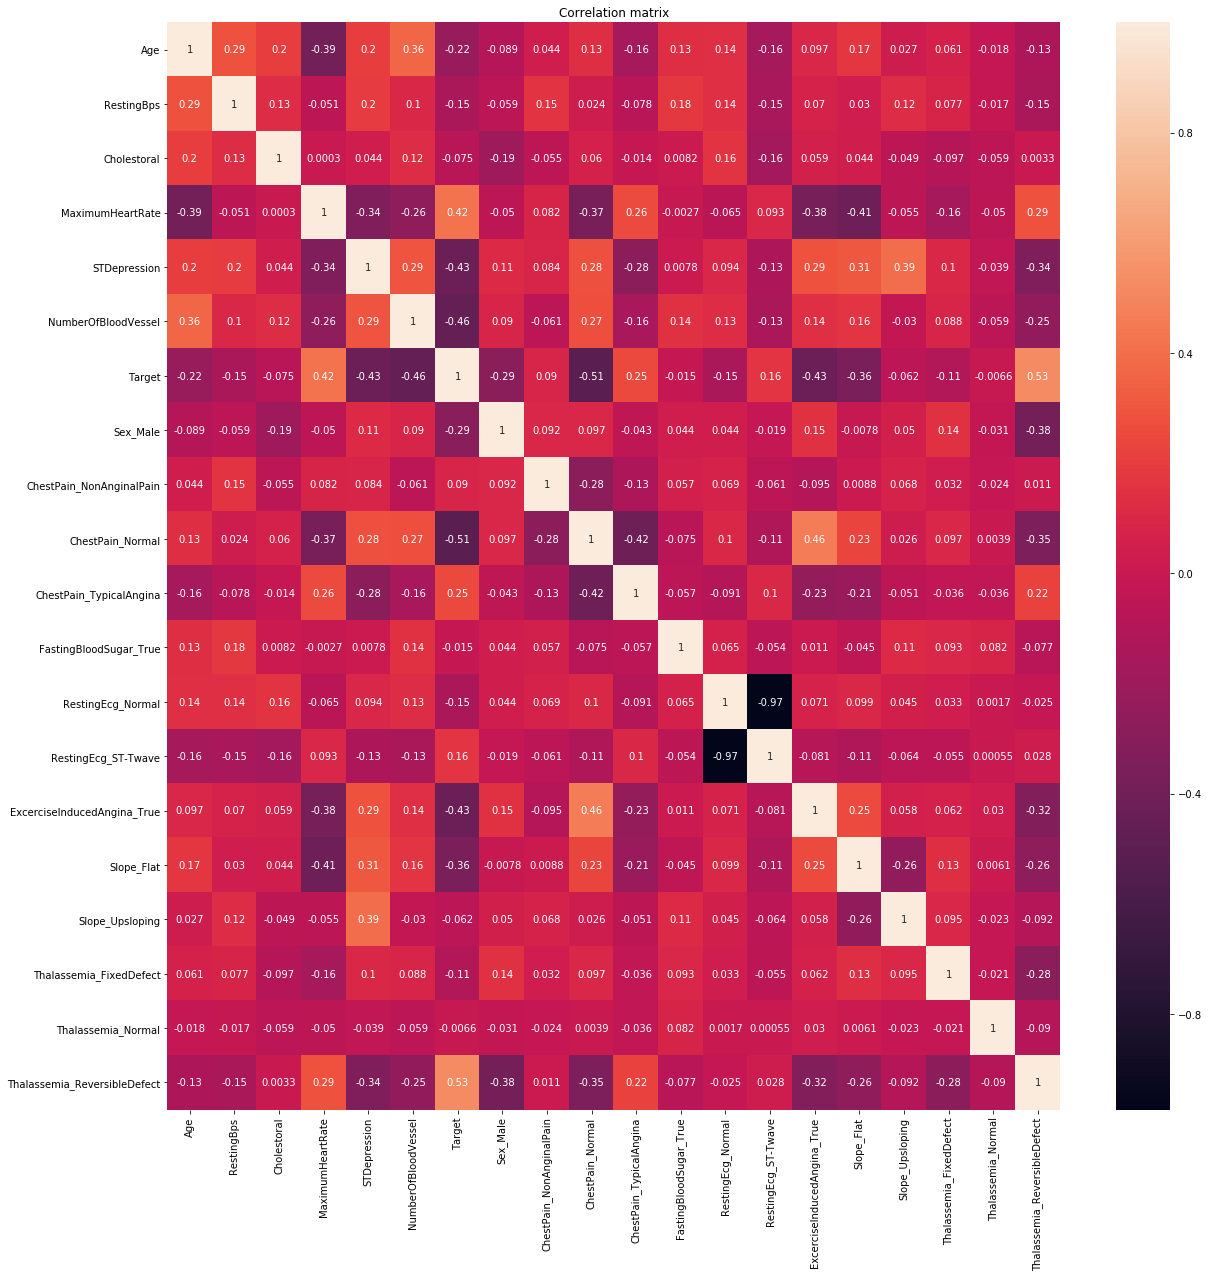

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(Corr,annot=True)
plt.title('Correlation matrix')
plt.show();

This is the correlation between Target and the features.

In [34]:
Corr['Target']

Age                            -0.224151
RestingBps                     -0.148283
Cholestoral                    -0.074977
MaximumHeartRate                0.417844
STDepression                   -0.429384
NumberOfBloodVessel            -0.464357
Target                          1.000000
Sex_Male                       -0.290113
ChestPain_NonAnginalPain        0.090167
ChestPain_Normal               -0.508495
ChestPain_TypicalAngina         0.245721
FastingBloodSugar_True         -0.014649
RestingEcg_Normal              -0.146535
RestingEcg_ST-Twave             0.162145
ExcerciseInducedAngina_True    -0.429199
Slope_Flat                     -0.358611
Slope_Upsloping                -0.061710
Thalassemia_FixedDefect        -0.105277
Thalassemia_Normal             -0.006642
Thalassemia_ReversibleDefect    0.526667
Name: Target, dtype: float64

## 3. Machine Learning <a name = 'machine'>

In order to perform classification methods, such as,SVM, or kNN, which use Euclidean distance, one needs to perform scale transformations to the independent variables so that each independent variable will have the same scale. But first one need to split the data set into a training data set and a test data set.

In [35]:
# Splitting independent variables and a dependent variable
X = df_copy.drop('Target', axis = 1)
y = df_copy['Target']

In [38]:
X.head()

,Age,RestingBps,Cholestoral,MaximumHeartRate,STDepression,NumberOfBloodVessel,Sex_Male,ChestPain_NonAnginalPain,ChestPain_Normal,ChestPain_TypicalAngina,FastingBloodSugar_True,RestingEcg_Normal,RestingEcg_ST-Twave,ExcerciseInducedAngina_True,Slope_Flat,Slope_Upsloping,Thalassemia_FixedDefect,Thalassemia_Normal,Thalassemia_ReversibleDefect
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,1,1,0,0
1,37,130,250,187,3.5,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,41,130,204,172,1.4,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,57,120,354,163,0.6,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [41]:
X_train.head()

,Age,RestingBps,Cholestoral,MaximumHeartRate,STDepression,NumberOfBloodVessel,Sex_Male,ChestPain_NonAnginalPain,ChestPain_Normal,ChestPain_TypicalAngina,FastingBloodSugar_True,RestingEcg_Normal,RestingEcg_ST-Twave,ExcerciseInducedAngina_True,Slope_Flat,Slope_Upsloping,Thalassemia_FixedDefect,Thalassemia_Normal,Thalassemia_ReversibleDefect
165,67,160,286,108,1.5,3,1,0,1,0,0,1,0,1,1,0,0,0,1
90,48,124,255,175,0.0,2,1,0,0,0,1,0,1,0,0,0,0,0,1
249,69,140,254,146,2.0,3,1,0,0,0,0,1,0,0,1,0,0,0,0
161,55,132,342,166,1.2,0,0,0,0,1,0,0,1,0,0,0,0,0,1
204,62,160,164,145,6.2,3,0,0,1,0,0,1,0,0,0,1,0,0,0


In [42]:
# Performing a scale transformation on the training data set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
# Putting back columns after rescale
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### A. Logistic Regression <a name ='logistic'>

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_Logistic = LogisticRegression(random_state = 0)
classifier_Logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
 # Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_Logistic = cross_val_score(estimator = classifier_Logistic, 
                                      X = X_train, 
                                      y = y_train, 
                                      cv = 10)

In [50]:
accuracies_Logistic

array([0.91304348, 0.91304348, 0.91304348, 0.95652174, 0.82608696,
       0.7826087 , 0.81818182, 0.76190476, 0.95238095, 0.85714286])

In [55]:
accuracies_Logistic.mean()

0.8693958215697346

That means on avarage when evaluating the model on th traning set the average accuracy is 86.9%.

In [56]:
# Predicting the Test set results
y_pred_Logistic = classifier_Logistic.predict(X_test)

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred_Logistic)

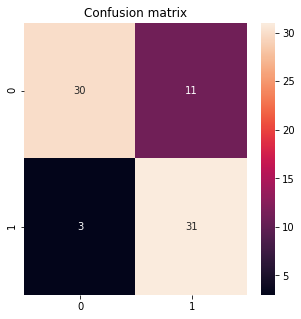

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_LogisticRegression,annot=True)
plt.title('Confusion matrix')
plt.show();

In [60]:
# Importing accuracy score
from sklearn.metrics import accuracy_score
accuracy_Logistic = accuracy_score(y_test, y_pred_Logistic)

In [61]:
accuracy_Logistic

0.8133333333333334

When evaluating the model on the test set, the accuracy is 81.3%.

### B. Support Vector Machine (SVM) <a name = 'SVM'>

In [63]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

Using grid search to find the optimum value of parametes.

In [78]:
# Paremeter tuning
parameters_SVM = [{'C': [1, 10, 100, 1000],
                   'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 
               'kernel': ['rbf'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [79]:
# Declaring grid search
grid_search_SVM = GridSearchCV(estimator = classifier_SVM,
                           param_grid = parameters_SVM,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [80]:
grid_search_SVM = grid_search_SVM.fit(X_train, y_train)

/Users/BuegPhysics/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [81]:
best_parameter_SVM = grid_search_SVM.best_params_

In [82]:
best_parameter_SVM

{'C': 1, 'kernel': 'linear'}

Traing the model with the best parameters from grid search.

In [83]:
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Performing cross-validation on the traning set.

In [84]:
accuracies_SVM = cross_val_score(estimator=classifier_SVM,
                                X=X_train,
                                y=y_train,
                                cv=10)

In [85]:
accuracies_SVM

array([0.91304348, 0.91304348, 0.95652174, 0.95652174, 0.82608696,
       0.82608696, 0.81818182, 0.80952381, 0.95238095, 0.9047619 ])

In [86]:
accuracies_SVM.mean()

0.8876152832674572

On average, the accuracy on the traning set of SVM model is 88.9%.

In [87]:
y_pred_SVM = classifier_SVM.predict(X_test)

In [88]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

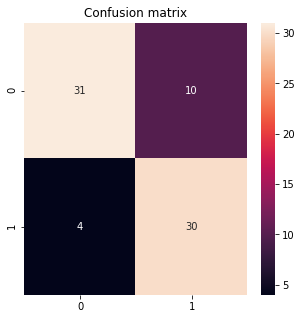

In [89]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_SVM,annot=True)
plt.title('Confusion matrix')
plt.show();

In [116]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

In [117]:
accuracy_SVM

0.8133333333333334

The accuracy of this model evaluating on test set is 81.3%.

Grid search tells us that the best parameter C is equal to 1, which is the default value, and the kernel function is a linear function. The best accuracy that we got is the average accuracy from cross validation of linearSVM model.

### C. k Nearest-Neighbor (kNN) <a name = 'kNN'>

In [92]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_kNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
parameters_kNN = [{'n_neighbors': range(1,15,1)}]

Performing grid search to find the optimum value of the number of neighbours(k).

In [105]:
grid_search_kNN = GridSearchCV(estimator=classifier_kNN,
                              param_grid=parameters_kNN,
                              scoring='accuracy',
                              cv=10,
                              n_jobs=-1)

In [106]:
grid_search_kNN =grid_search_kNN.fit(X_train,y_train)

/Users/BuegPhysics/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [107]:
grid_search_kNN.best_params_

{'n_neighbors': 3}

The best number of neighbours is three. The model will be trained with the number of neighbours equal three.

In [108]:
classifier_kNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier_kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Performing cross-validation on the training set with the new model with the number of neighbours equal three.

In [109]:
accuracies_kNN = cross_val_score(estimator=classifier_kNN,
                                X=X_train,
                                y=y_train,
                                cv=10)

In [110]:
accuracies_kNN

array([0.91304348, 0.86956522, 0.91304348, 0.82608696, 0.82608696,
       0.73913043, 0.90909091, 0.76190476, 0.9047619 , 0.85714286])

In [111]:
accuracies_kNN.mean()

0.8519856954639563

On average, the accuracy on the training set is 85.1%. Next, making the prediction on the test set.

In [112]:
y_pred_kNN = classifier_kNN.predict(X_test)

In [113]:
cm_kNN = confusion_matrix(y_test, y_pred_kNN)

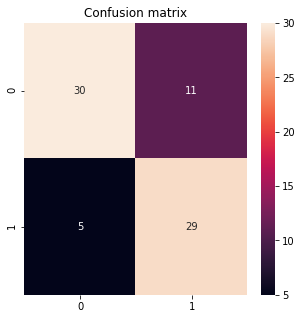

In [114]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_kNN,annot=True)
plt.title('Confusion matrix')
plt.show();

In [118]:
accuracy_kNN = accuracy_score(y_test, y_pred_kNN)

In [119]:
accuracy_kNN

0.7866666666666666

The accuracy score on the test set is 78.6%

### D. Naive Bayes' classification <a name = 'naive'>

In [120]:
# Fitting Naive Bayes' method to training set
from sklearn.naive_bayes import GaussianNB
classifier_naive_bayes = GaussianNB()
classifier_naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_pred_naive = classifier4.predict(X_test)

Performing cross-validation on the training set.

In [121]:
accuracies_naive_bayes = cross_val_score(estimator=classifier_naive_bayes,
                                        X=X_train,
                                        y=y_train,
                                        cv=10)

In [122]:
accuracies_naive_bayes

array([0.91304348, 0.91304348, 0.86956522, 0.95652174, 0.7826087 ,
       0.52173913, 0.77272727, 0.33333333, 0.9047619 , 1.        ])

In [123]:
accuracies_naive_bayes.mean()

0.7967344249952946

On average, the accuracy of the training set is 79.6%.

In [124]:
y_pred_naive_bayes = classifier_naive_bayes.predict(X_test)

In [125]:
cm_naive = confusion_matrix(y_test, y_pred_naive_bayes)

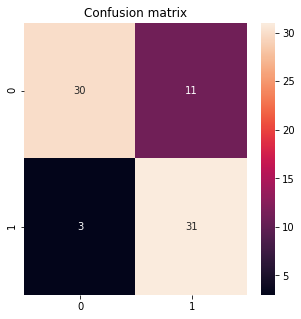

In [126]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_naive,annot=True)
plt.title('Confusion matrix')
plt.show();

In [129]:
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

In [130]:
accuracy_naive_bayes

0.8133333333333334

The accuracy of this model on the test set is 81.3%.

### E. Decision tree classification <a name = 'tree'>

When using the decision tree classification, the scale transformaion do not need to be performed. However, the scale transformation will make the model fitted quicker than the non-transformed model.

In [131]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

There are many parameters that can be adjusted. By tuning this parameters, the overfitting of the model can be controlled. These parameters are
1. Minimum samples for a node split
2. Minimum samples for a terminal node
3. Maximum depth of tree
4. Maximum number of leaves
5. Maximum features to split
In this project, grid search will be used to find the optimal values for the model.

In [132]:
classifier_decision_tree = DecisionTreeClassifier()

In [133]:
parameters_Tree = [{'min_samples_split': range(2,5,1), 'min_samples_leaf':range(1,5,1),
                   'max_depth': range(1,7,1), 'max_leaf_nodes':range(2,10,1), 'max_features':range(1,10,1)}]

In [134]:
grid_search_Tree = GridSearchCV(estimator = classifier_decision_tree,
                           param_grid = parameters_Tree,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [135]:
grid_search_Tree = grid_search_Tree.fit(X_train, y_train)

/Users/BuegPhysics/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [137]:
best_parameters_Tree = grid_search_Tree.best_params_

In [138]:
best_parameters_Tree

{'max_depth': 6,
 'max_features': 7,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

Let's try to fit the decision tree model with these parameters.

In [139]:
classifier_decision_tree = DecisionTreeClassifier(max_depth=6,max_features=7,max_leaf_nodes=8,min_samples_leaf=2,min_samples_split=3)

In [140]:
classifier_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=7, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [141]:
accuracies_decision_tree = cross_val_score(estimator=classifier_decision_tree,
                                          X=X_train,
                                          y=y_train,
                                          cv=10)

In [142]:
accuracies_decision_tree

array([0.91304348, 0.73913043, 0.91304348, 0.91304348, 0.69565217,
       0.65217391, 0.72727273, 0.66666667, 0.85714286, 0.9047619 ])

In [143]:
accuracies_decision_tree.mean()

0.7981931112365894

On avarege, the accuracy on the training set is 79.8%.

In [144]:
y_pred_tree = classifier_decision_tree.predict(X_test)

In [145]:
cm_tree = confusion_matrix(y_test,y_pred_tree)

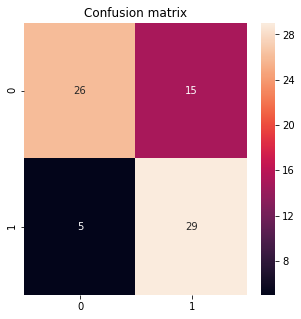

In [146]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tree,annot=True)
plt.title('Confusion matrix')
plt.show();

In [147]:
accuracy_decision_tree = accuracy_score(y_test,y_pred_tree)

In [148]:
accuracy_decision_tree

0.7333333333333333

The accuracy of the test set is 73.3%.

### F. Random forest classification <a name = 'forest'>

In [149]:
# Importing random forest classification
from sklearn.ensemble import RandomForestClassifier 

In [150]:
classifier_random_forest = RandomForestClassifier(n_estimators=50,criterion='gini', random_state=0)

Performing grid search to find the best n_estimator, and the criterion.

In [151]:
parameters_Forest = [{'n_estimators':[110,130,150,160,170,190],'criterion':['entropy','gini']}]

In [152]:
grid_search_Forest = GridSearchCV(estimator = classifier_random_forest,
                           param_grid = parameters_Forest,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [153]:
grid_search_Forest=grid_search_Forest.fit(X=X_train,y=y_train)

/Users/BuegPhysics/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [154]:
grid_search_Forest.best_params_

{'criterion': 'gini', 'n_estimators': 130}

Make a new model based on the best parameter from grid search.

In [161]:
classifier_random_forest = RandomForestClassifier(n_estimators=130,criterion='gini', random_state=0)
classifier_random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Performing cross-validation on the model.

In [162]:
accuracies_random_forest = cross_val_score(estimator=classifier_random_forest,
                                          X=X_train,
                                          y=y_train,
                                          cv=10)

In [163]:
accuracies_random_forest

array([0.95652174, 0.7826087 , 0.91304348, 0.95652174, 0.73913043,
       0.73913043, 0.81818182, 0.71428571, 1.        , 0.9047619 ])

In [164]:
accuracies_random_forest.mean()

0.8524185958968568

On average, the accuracy of the trainning set is 85.2%.

In [165]:
y_pred_Forest = classifier_random_forest.predict(X_test)

In [166]:
# Calculating confusion matrix
cm_Forest = confusion_matrix(y_test, y_pred_Forest)

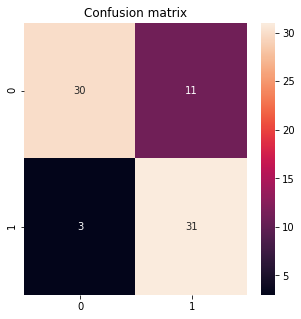

In [167]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_Forest,annot=True)
plt.title('Confusion matrix')
plt.show();

In [168]:
accuracy_random_forest = accuracy_score(y_test,y_pred_Forest)

In [169]:
accuracy_random_forest

0.8133333333333334

The accuracy on the test set is 81.3%.

### G. Summary <a name = 'summary'>

In [170]:
Accuracy_model = {'Model':['Logistic Regression','SVM','kNN','Naive Bayes','Decision Tree','Random Forest'],
                 'Score':[accuracy_Logistic,accuracy_SVM,accuracy_kNN, 
                          accuracy_naive_bayes, accuracy_decision_tree, accuracy_random_forest]}

In [171]:
Accuracy_model = pd.DataFrame(Accuracy_model, columns =['Model', 'Score'])

In [172]:
Accuracy_model.set_index('Model')

,Score
Model,
Logistic Regression,0.813333
SVM,0.813333
kNN,0.786667
Naive Bayes,0.813333
Decision Tree,0.733333
Random Forest,0.813333


From the table, Logistic Regression, SVM, Naive Bayes,and Random forest classifier has the most accurcy score, while the Decision Tree has the least accuracy score.

### H. Ensemble Model <a name = 'ensemble'>

In this section, a new classification will be constructed from top four classifications.

In [174]:
from sklearn.ensemble import VotingClassifier

In [212]:
classifier_voting = VotingClassifier(estimators=[('Logistic Regression',classifier_Logistic),
                                                 ('SVM',classifier_SVM),             
                                                 ('Naive Bayes', classifier_naive_bayes),
                                                 ('Random Forest', classifier_random_forest)],
                                     voting='hard')

In [213]:
classifier_voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('SVM',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decisi...
                                                     class_weight=None,
                                     

In [222]:
accuracies_voting = cross_val_score(estimator=classifier_voting,
                                   X=X_train,
                                   y=y_train,
                                   cv=10)

In [223]:
accuracies_voting

array([0.95652174, 0.91304348, 0.95652174, 0.95652174, 0.82608696,
       0.7826087 , 0.81818182, 0.76190476, 0.95238095, 1.        ])

In [216]:
accuracies_voting.mean()

0.892377188029362

On average, the accuracy of voting classifier is 89.2%.

In [225]:
y_pred_voting = classifier_voting.predict(X_test)

In [226]:
# Calculating confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)

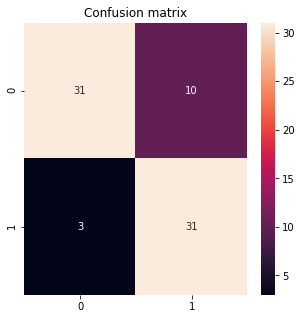

In [227]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_voting,annot=True)
plt.title('Confusion matrix')
plt.show();

In [228]:
accuracy_voting = accuracy_score(y_test,y_pred_voting)

In [229]:
accuracy_voting

0.8266666666666667

In [231]:
Accuracy_model = {'Model':['Logistic Regression','SVM','kNN','Naive Bayes','Decision Tree','Random Forest','Voting'],
                 'Score':[accuracy_Logistic,accuracy_SVM,accuracy_kNN, 
                          accuracy_naive_bayes, accuracy_decision_tree, accuracy_random_forest, accuracy_voting]}
Accuracy_model = pd.DataFrame(Accuracy_model, columns =['Model', 'Score'])
Accuracy_model.set_index('Model')

,Score
Model,
Logistic Regression,0.813333
SVM,0.813333
kNN,0.786667
Naive Bayes,0.813333
Decision Tree,0.733333
Random Forest,0.813333
Voting,0.826667


Th voting classifier gives a better accuracy on the test set than other models.

## 4. Artificial Neural Network <a name = 'network'>

In this section, an aritificial neural netwrok will be create and train to predict the heart diesease rate on the data.

In [235]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [236]:
number_input = len(X.columns)

In [237]:
number_input

19

In [238]:
number_output = 1

The number of output will be one, which is True or False.

In [290]:
#Initialize the ANN
classifier_ANN = Sequential()

Creating the first hidden layer with the number of nodes equal to (number_input+number_output)/2. In this case, it equal ten.

In [291]:
number_hidden1 = int((number_input+number_output)/2)

In [292]:
number_hidden1

10

In [293]:
classifier_ANN.add(Dense(output_dim = number_hidden1,
                        init = 'uniform',
                        activation='relu',
                        input_dim = number_input))

Creating the output layer.

In [294]:
classifier_ANN.add(Dense(output_dim = number_output,
                        init = 'uniform',
                        activation='sigmoid'))

In [295]:
classifier_ANN.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the classifier

In [296]:
classifier_ANN.fit(X_train,y_train, batch_size=1, nb_epoch = 50)

Epoch 1/50
223/223 [==============================] - 1s 4ms/step - loss: 0.6533 - acc: 0.6457
Epoch 2/50
223/223 [==============================] - 0s 2ms/step - loss: 0.4822 - acc: 0.8655
Epoch 3/50
223/223 [==============================] - 0s 2ms/step - loss: 0.3731 - acc: 0.8700
Epoch 4/50
223/223 [==============================] - 0s 2ms/step - loss: 0.3258 - acc: 0.8789
Epoch 5/50
223/223 [==============================] - 0s 2ms/step - loss: 0.3033 - acc: 0.8834
Epoch 6/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2903 - acc: 0.8969
Epoch 7/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2814 - acc: 0.9013
Epoch 8/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2747 - acc: 0.9013
Epoch 9/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2694 - acc: 0.9013
Epoch 10/50
223/223 [==============================] - 0s 2ms/step - loss: 0.2646 - acc: 0.9013
Epoch 11/50
223/223 [============================

In [297]:
classifier_ANN.save('Heart_disease_ANN.h5')

Let's look at the result on the test set.

In [298]:
y_pred_ANN = classifier_ANN.predict(X_test)

In [299]:
y_pred_ANN = (y_pred_ANN > 0.5)

In [300]:
# Calculating confusion matrix
cm_ANN = confusion_matrix(y_test, y_pred_ANN)

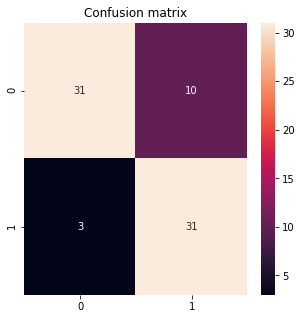

In [301]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ANN,annot=True)
plt.title('Confusion matrix')
plt.show();

In [302]:
accuracy_ANN = accuracy_score(y_test,y_pred_ANN)

In [303]:
accuracy_ANN

0.8266666666666667

The accuracy of the Artificial Neural Network on the test set is 82.7%.

In [304]:
Accuracy_model = {'Model':['Logistic Regression','SVM','kNN','Naive Bayes','Decision Tree','Random Forest','Voting','ANN'],
                 'Score':[accuracy_Logistic,accuracy_SVM,accuracy_kNN, 
                          accuracy_naive_bayes, accuracy_decision_tree, accuracy_random_forest, accuracy_voting, accuracy_ANN]}
Accuracy_model = pd.DataFrame(Accuracy_model, columns =['Model', 'Score'])
Accuracy_model.set_index('Model')

,Score
Model,
Logistic Regression,0.813333
SVM,0.813333
kNN,0.786667
Naive Bayes,0.813333
Decision Tree,0.733333
Random Forest,0.813333
Voting,0.826667
ANN,0.826667
